In [1]:
%matplotlib notebook
%load_ext autoreload
from glob import glob
from skimage import io
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
import time


In [7]:
# import sys
# sys.path.append('/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface')

In [186]:
%%bash
#export PATH="$PATH:/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/util"
PYTHONPATH='/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/' 
#python align-dlib.py
pwd
#python -c "import sys; print(sys.path)"
python '/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/util/align-dlib.py' \
images1 align innerEyesAndBottomLip images1_ed --size 48
#python ./align-dlib.py ./images1 align innerEyesAndBottomLip ./images1_ed --size 64

/Volumes/SAM_USB/gsync_FE
=== images1/14.png ===
=== images1/8.png ===
=== images1/3.png ===
=== images1/15.png ===
=== images1/4.png ===
=== images1/13.png ===
=== images1/6.png ===
=== images1/12.png ===
=== images1/2.png ===
=== images1/10.png ===
=== images1/5.png ===
=== images1/7.png ===
=== images1/11.png ===
=== images1/9.png ===
=== images1/0.png ===
=== images1/1.png ===


In [3]:
ls

Arnold_Schwarzenegger.jpg*           align_dlib.py*
Beautiful_soup.ipynb*                bootstrap_replace.ipynb*
Decorator .ipynb*                    face_plot.svg*
Kmeans.ipynb*                        face_plot1.svg*
NV Scan.pdf*                         face_plot2.svg*
NV Scan2.pdf*                        flask_dev_setup.ipynb*
NV Scan2_narrow.pdf*                 images1/
NV Scan_narrow.pdf*                  images1_ed/
Neural networks.ipynb*               neural_network/
PCA/                                 openface/
ROC_curve.pdf*                       peak finder in 2D array-Copy1.ipynb*
Ud_neuro/                            peak finder in 2D array.ipynb*
Untitled.ipynb*                      sql_tutorial/
Untitled1.ipynb*                     test.html*
Word Counts/                         test_spacemacs.py*


In [2]:
# https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
#Y'=0.299R'+0.587G'+0.114B'

<IPython.core.display.Javascript object>


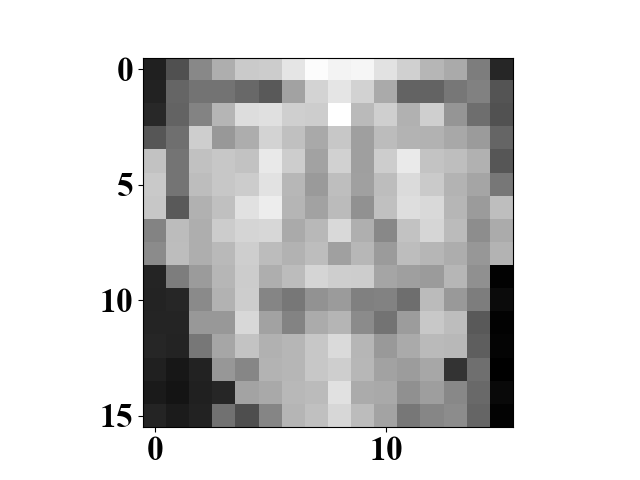

In [46]:
img=io.imread('Arnold_Schwarzenegger.png',as_grey=True)
plt.figure()
plt.imshow(img,cmap='gray')

In [47]:
img.shape

(16, 16)

In [5]:
b=np.dot(img[:,:,:3],[0.299,0.587,0.114])

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

img_grey=rgb2gray(img)


<IPython.core.display.Javascript object>


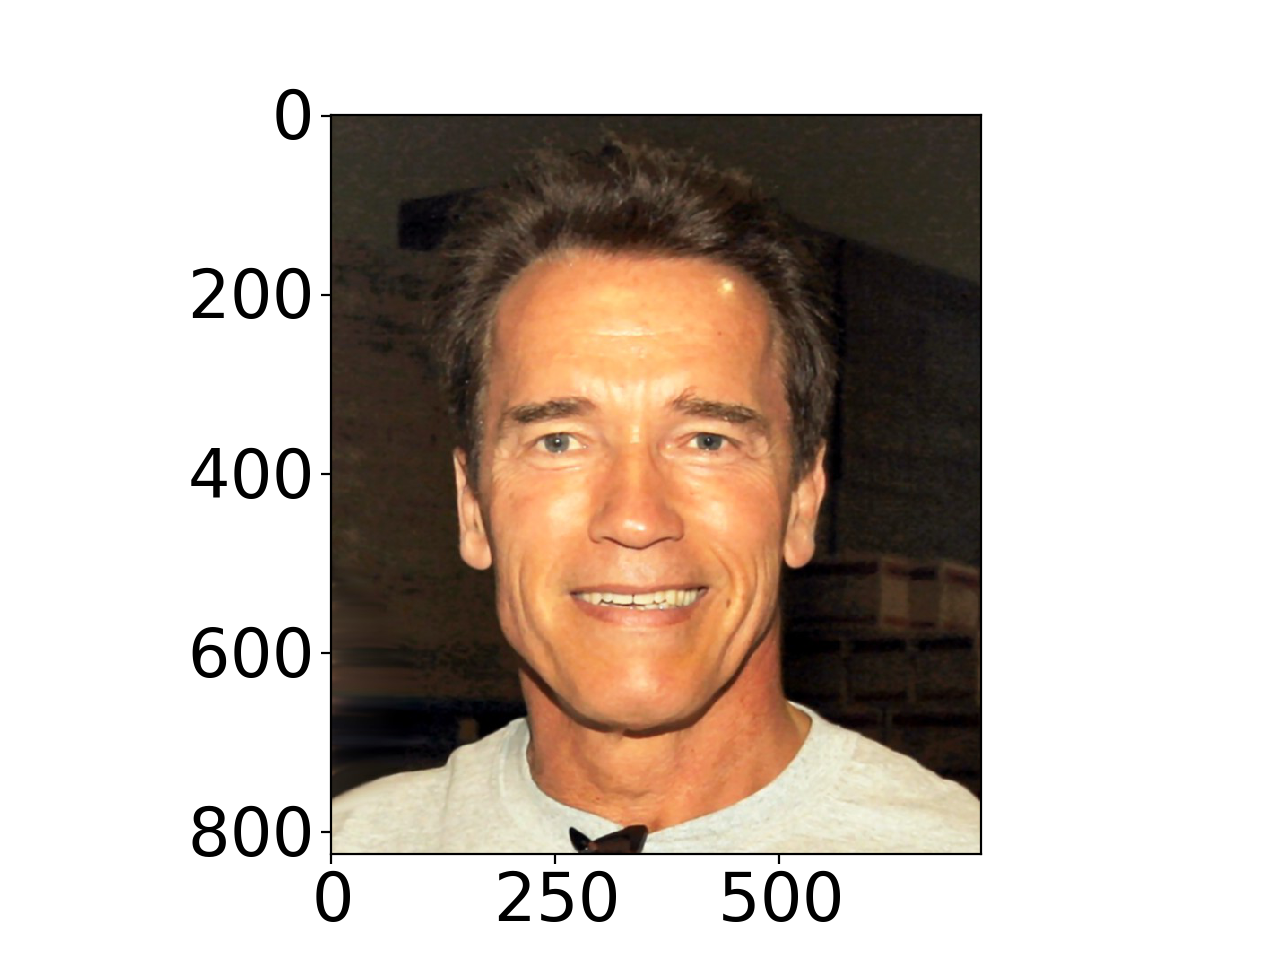

In [7]:
plt.imshow(img_grey)
plt.imshow(img)

<IPython.core.display.Javascript object>


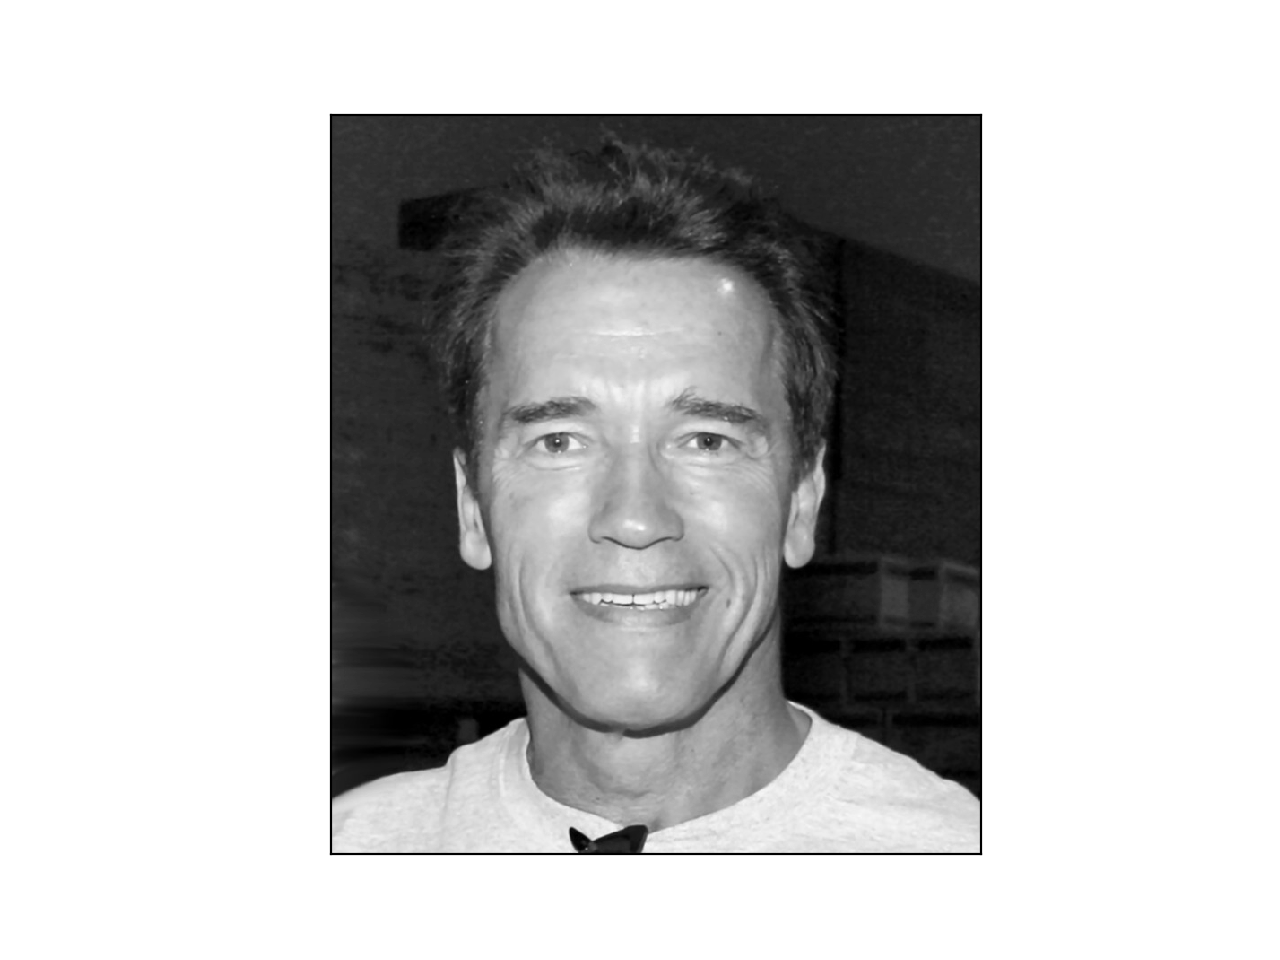

In [21]:
plt.figure()
plt.imshow(img_grey,cmap='gray')

In [41]:
img1=io.imread('images1_ed/images1/Arnold_Schwarzenegger.png')

In [35]:
def print_image(x,ax):
    img1=io.imread(x)
    ax.imshow(img1)
    ax.set_xticks([])
    ax.set_yticks([])
    #return np.array(img11,dtype='int')
    

['images1_ed/images1/Arnold_Schwarzenegger.png', 'images1_ed/images1/636100364.png', 'images1_ed/images1/1334.png']


<IPython.core.display.Javascript object>


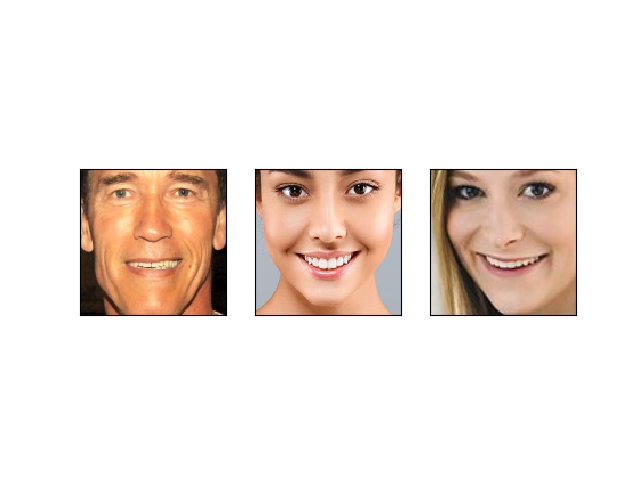

In [37]:
ed_flist=glob('images1_ed/images1/*')
print(ed_flist)
fig,ax=plt.subplots(1,3)
ax=ax.ravel()
for i in range(len(ed_flist)):
    print_image(ed_flist[i],ax[i])

In [58]:
img2=np.array(img*255,dtype='int')
img3=np.copy(img2)
img3[img3 < 175] -=85

<IPython.core.display.Javascript object>


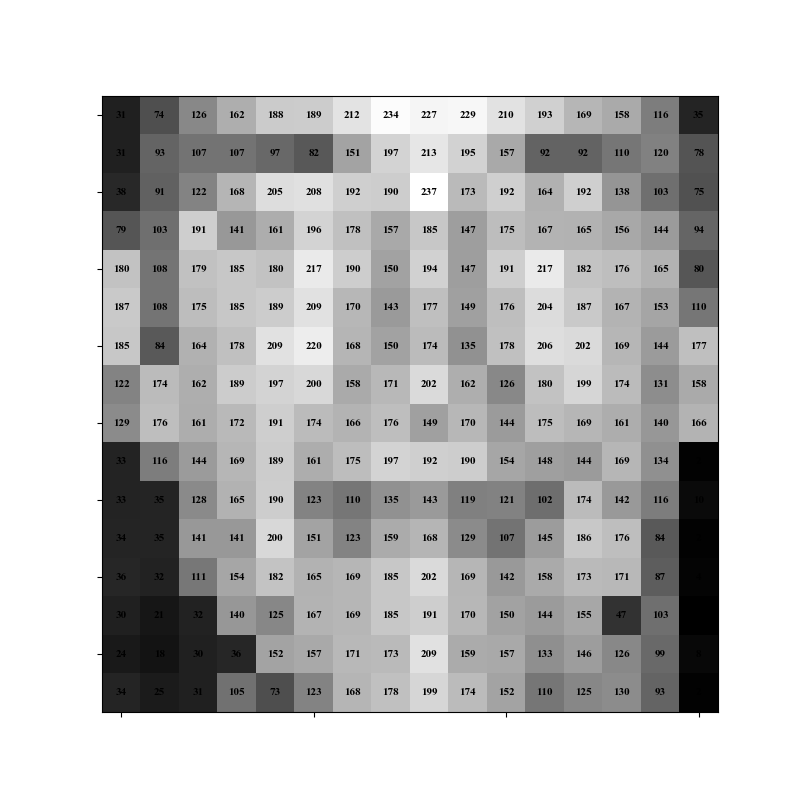

In [55]:
fig,ax=plt.subplots(figsize=(8,8))

for (j,i),label in np.ndenumerate(img2):
    ax.imshow(img2,cmap='gray',alpha=0.8)
    ax.imshow(img2,alpha=0)
    ax.text(i,j,label,ha='center',va='center',fontsize=8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
#fig.savefig('face_plot2.svg')
#plt.close()

<IPython.core.display.Javascript object>


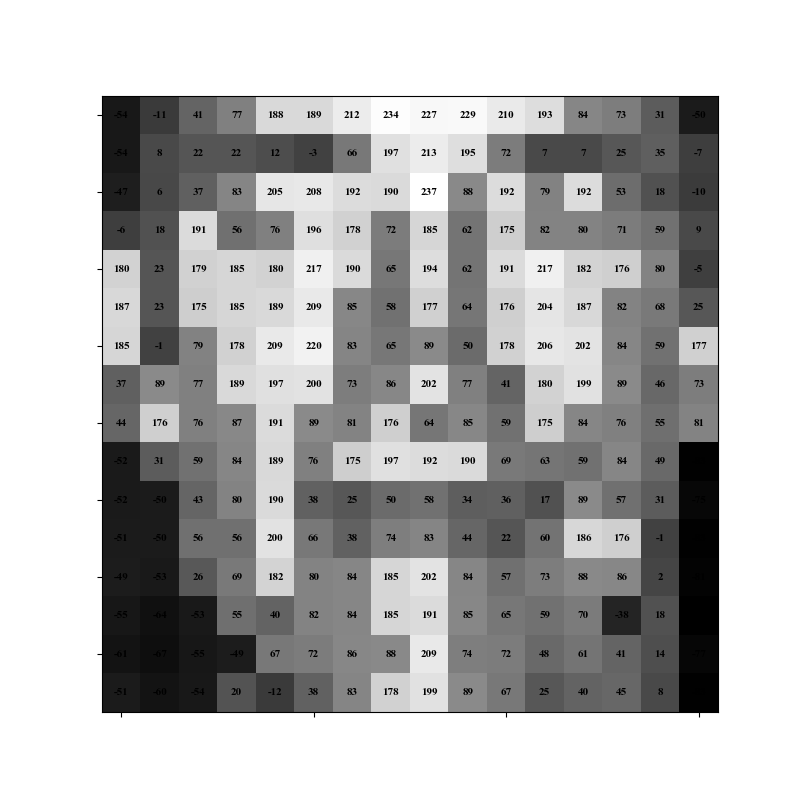

In [59]:
fig,ax=plt.subplots(figsize=(8,8))

for (j,i),label in np.ndenumerate(img3):
    ax.imshow(img3,cmap='gray',alpha=0.8)
    ax.imshow(img3,alpha=0)
    ax.text(i,j,label,ha='center',va='center',fontsize=8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
#fig.savefig('face_plot2.svg')
#plt.close()

<IPython.core.display.Javascript object>


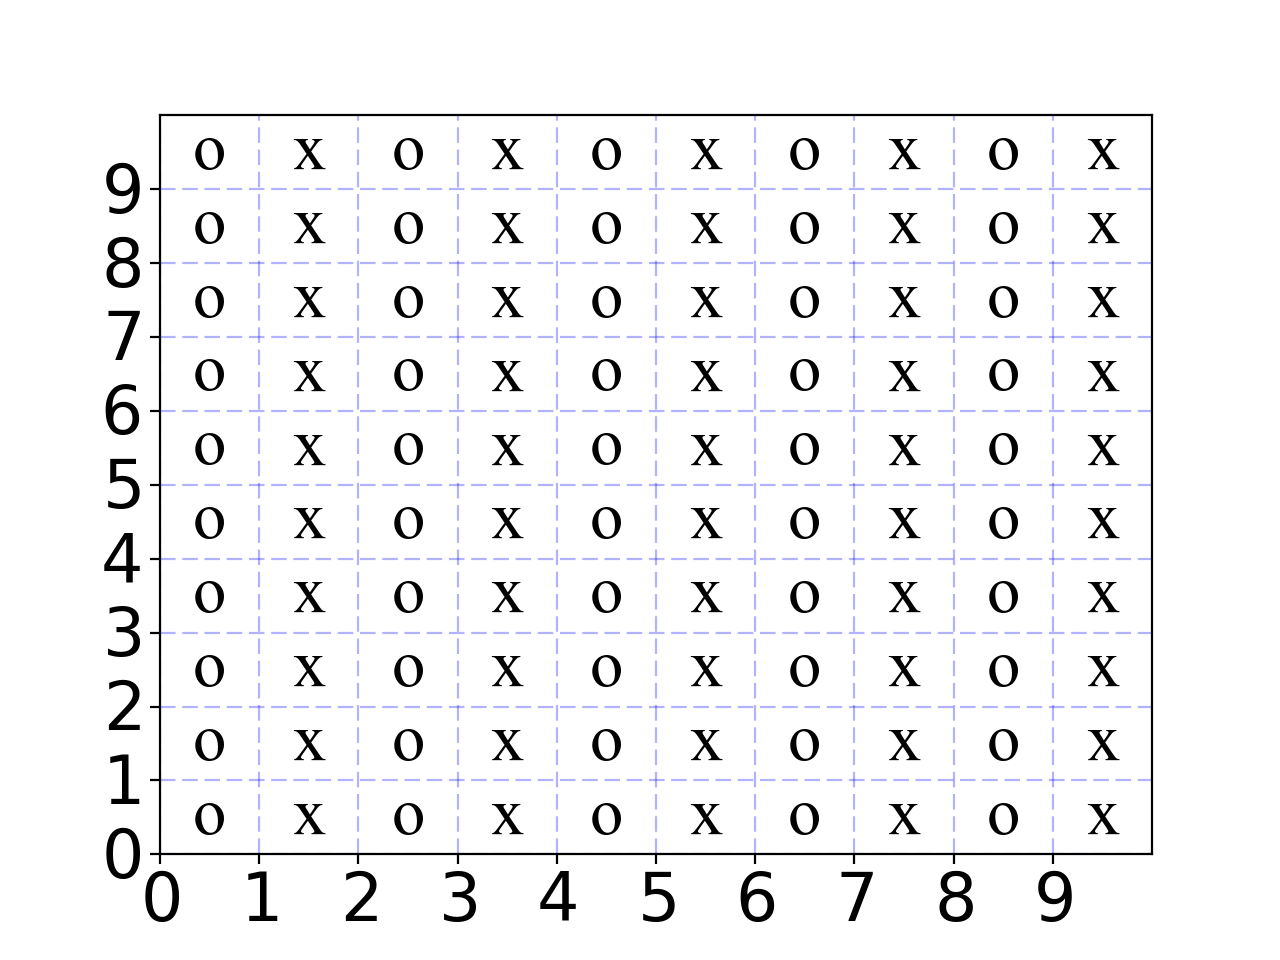

In [27]:
fig, ax = plt.subplots()

min_val, max_val = 0, 10
ind_array = np.arange(min_val + 0.5, max_val + 0.5, 1.0)
x, y = np.meshgrid(ind_array, ind_array)

for i, (x_val, y_val) in enumerate(zip(x.flatten(), y.flatten())):
    c = 'x' if i%2 else 'o' 
    ax.text(x_val, y_val, c, va='center', ha='center')
#alternatively, you could do something like
#for x_val, y_val in zip(x.flatten(), y.flatten()):
#    c = 'x' if (x_val + y_val)%2 else 'o'

ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_xticks(np.arange(max_val))
ax.set_yticks(np.arange(max_val))
ax.grid()

In [60]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [83]:
style.use('bmh')

<IPython.core.display.Javascript object>


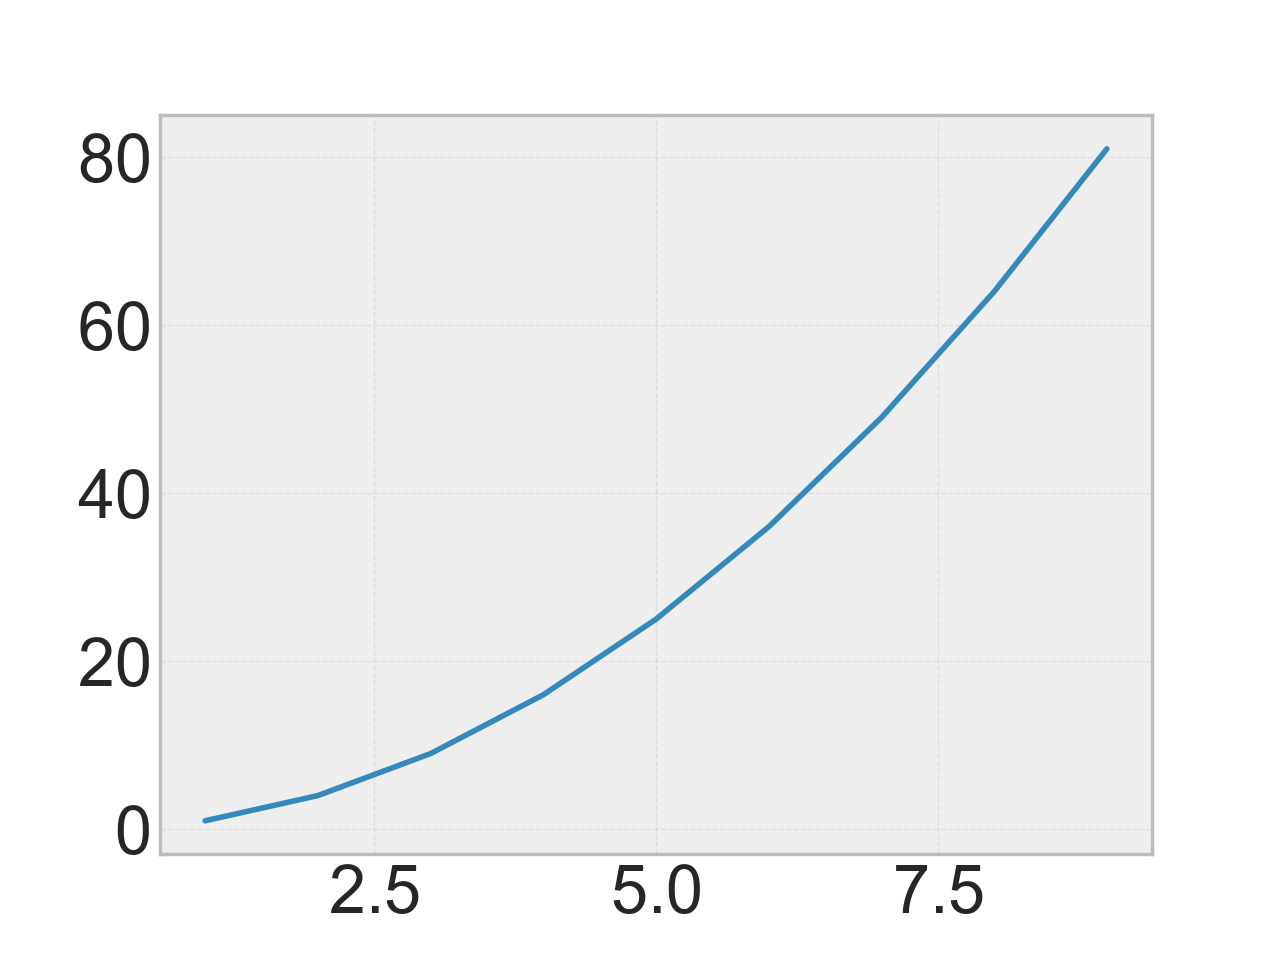

In [84]:
x=np.arange(1,10)
plt.figure()
plt.plot(x,x**2)

In [2]:
data=pd.read_csv('fer2013/fer2013.csv')

In [4]:
data.iloc[:10,:].to_csv('Images/gitsync/sample.csv')

In [197]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [199]:
data[data['Usage'] == 'PublicTest'].head()

emotion                                             pixels       Usage
28709        0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...  PublicTest
28710        1  156 184 198 202 204 207 210 212 213 214 215 21...  PublicTest
28711        4  69 118 61 60 96 121 103 87 103 88 70 90 115 12...  PublicTest
28712        6  205 203 236 157 83 158 120 116 94 86 155 180 2...  PublicTest
28713        3  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...  PublicTest

In [200]:
data[data['Usage'] == 'PrivateTest'].head()

emotion                                             pixels        Usage
32298        0  170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...  PrivateTest
32299        5  7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...  PrivateTest
32300        6  232 240 241 239 237 235 246 117 24 24 22 13 12...  PrivateTest
32301        4  200 197 149 139 156 89 111 58 62 95 113 117 11...  PrivateTest
32302        2  40 28 33 56 45 33 31 78 152 194 200 186 196 20...  PrivateTest

In [149]:
len(data.iloc[:2,1].values)

2

NameError: name 'labels' is not defined

In [161]:
img=data.iloc[0,1].split(' ')
def reformat_images(image_data):
    return np.fromstring(image_data, dtype=int, sep=" ")

In [166]:
images=np.array(list(map(reformat_images,data.iloc[:,1].values)))

In [136]:
print('\033[1;31m'+'Unique Label = {}'.format(np.sort(data.emotion.unique())))

Unique Label = [0 1 2 3 4 5 6]


In [142]:
num_labels=len(data.emotion.unique())

def reformat_labels(labels):
  
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  #return enc.fit_transform(labels.reshape(-1,1))
  return labels

reformat_labels(np.array([0,1,2]))

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)

In [205]:
labels=data.emotion.values
labels[:10]

array([0, 0, 2, 4, 6, 2, 4, 3, 3, 2])

In [209]:
import warnings
for i in range(len(images)):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        io.imsave('images1/'+str(i)+'_'+str(labels[i])+\
              '.png',images[i].reshape(48,-1));

In [210]:
%%bash
#export PATH="$PATH:/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/util"
PYTHONPATH='/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/' 
python '/Volumes/SAM_USB/Data Science/Short_IPython_notebook/openface/util/align-dlib.py' \
images1 align innerEyesAndBottomLip images1_ed --size 48

=== images1/13990_3.png ===
=== images1/16490_0.png ===
=== images1/21400_2.png ===
=== images1/9573_2.png ===
=== images1/14174_6.png ===
=== images1/14221_0.png ===
=== images1/52_5.png ===
=== images1/8137_5.png ===
=== images1/34667_2.png ===
=== images1/27986_4.png ===
=== images1/3790_6.png ===
=== images1/24532_4.png ===
=== images1/16487_4.png ===
=== images1/2684_0.png ===
=== images1/1148_4.png ===
=== images1/5592_5.png ===
=== images1/27063_4.png ===
=== images1/8360_4.png ===
=== images1/2903_0.png ===
=== images1/32259_3.png ===
=== images1/16292_0.png ===
=== images1/869_2.png ===
=== images1/8000_0.png ===
=== images1/7441_3.png ===
=== images1/30692_6.png ===
=== images1/21362_5.png ===
=== images1/4839_3.png ===
=== images1/14153_1.png ===
=== images1/13782_2.png ===
=== images1/26420_2.png ===
=== images1/2638_2.png ===
=== images1/33181_4.png ===
=== images1/16520_0.png ===
=== images1/28544_5.png ===
=== images1/20883_0.png ===
=== images1/26089_0.png ===
=== image

In [97]:
img1=np.array(img,dtype='int')

<IPython.core.display.Javascript object>


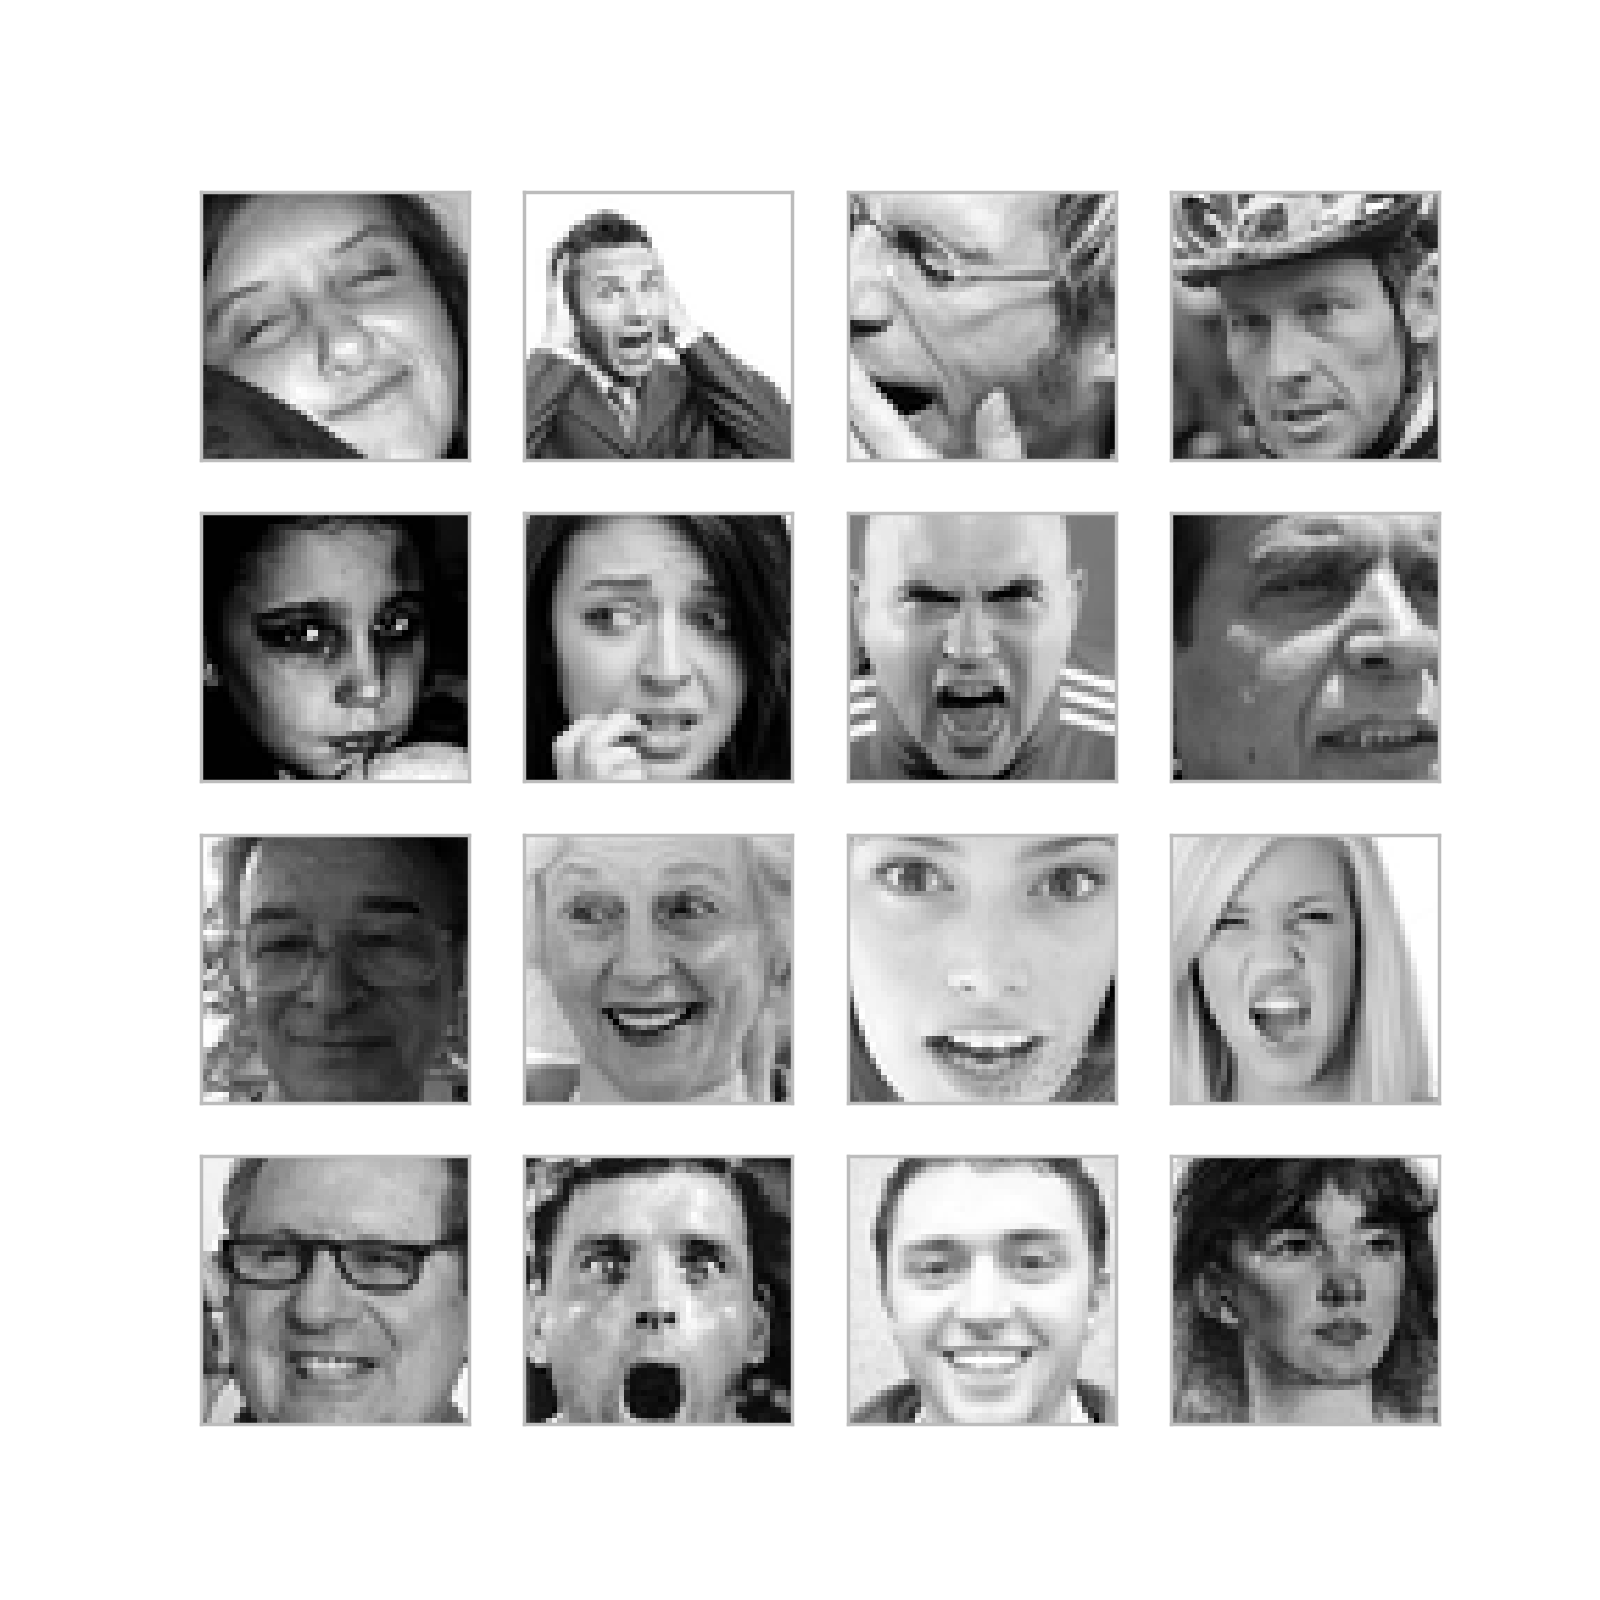

/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Volumes/SAM_USB/scikit-image/skimage/io/_io.py:139: UserWarning: images1/6.png is a low contrast image
  

In [178]:
#img2=images[0].reshape(48,48)
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()
for i in range(16):
    io.imsave('images1/'+str(i)+'_'+str(labels[i])+'.png',images[i+16].reshape(48,-1))
    ax[i].imshow(images[i+16].reshape(48,-1),cmap='gray')
    ax[i].set_yticks([])
    ax[i].set_xticks([])

In [176]:
ls

Arnold_Schwarzenegger.png* images1_ed/
Get_face.ipynb*            jaffe/
data_preprocess.ipynb*     jaffe_data.txt*
fer2013/                   jaffe_face/
images1/


In [187]:
a=io.imread('/Volumes/SAM_USB/gsync_FE/images1/0.png')
#plt.figure()
np.shape(a)

(48, 48)

In [189]:
a1=io.imread('/Volumes/SAM_USB/gsync_FE/images1_ed/images1/0.png',as_grey=True)
np.shape(a1)

(48, 48)

In [191]:
a[1]

array([ 16,  14,  24,  28,  27,  25,  31,  43,  65,  84,  97,  96,  96,
       101, 102, 109, 104, 102, 100, 101, 103, 106, 108, 107, 103, 103,
        96,  92,  83,  79,  75,  65,  54,  37,  28,  25,  23,  42,  57,
        78, 137, 139, 132, 138, 145, 147, 154, 156], dtype=uint8)

In [196]:
len(images)

35887

<IPython.core.display.Javascript object>


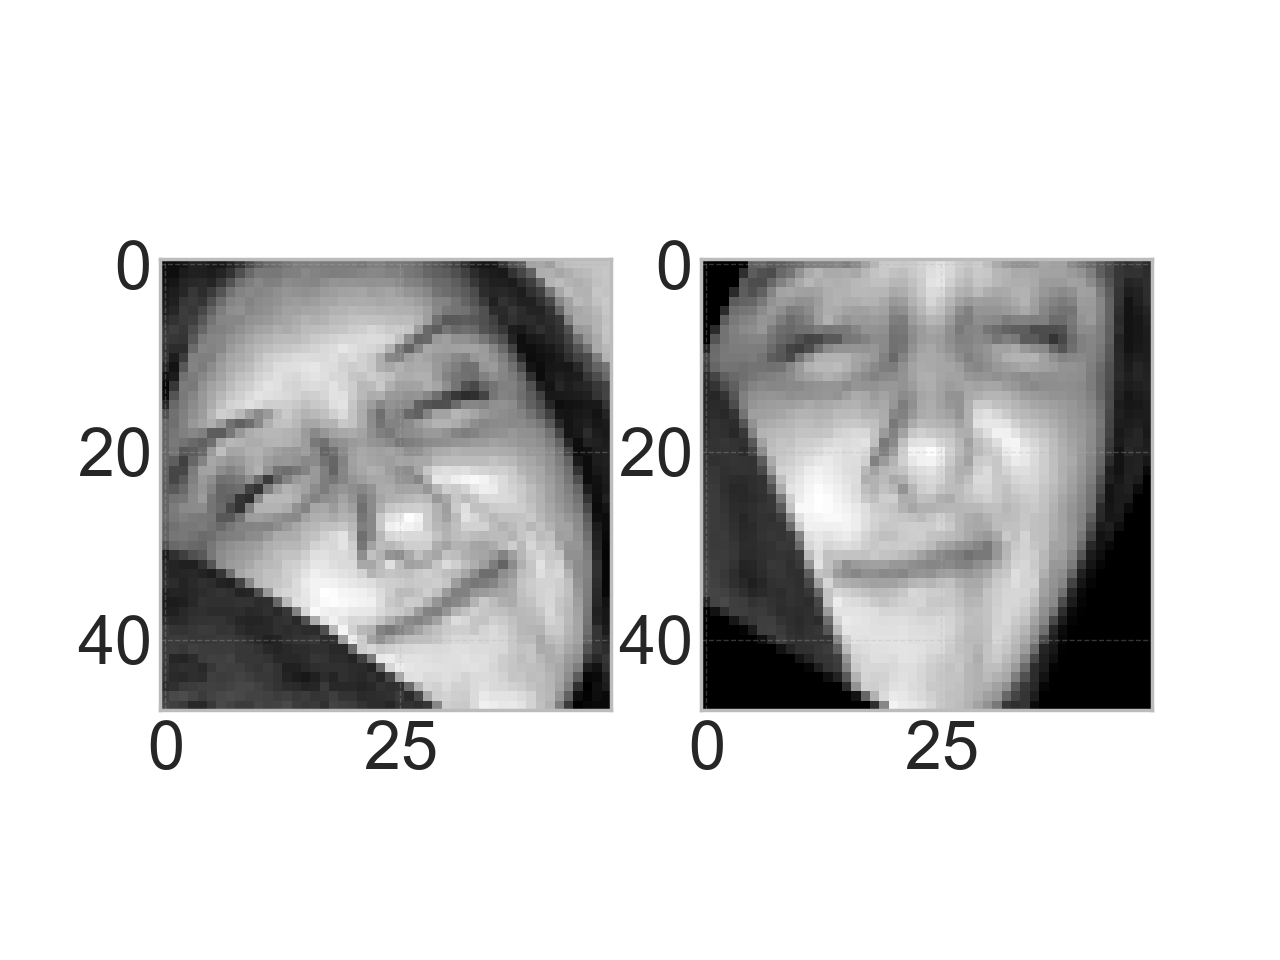

In [195]:
fig,ax=plt.subplots(1,2)
ax=ax.ravel()
ax[0].imshow(a,cmap='gray')
ax[1].imshow(a1,cmap='gray')

In [215]:
ed_images_filelist=sorted(glob('images1_ed/images1/*'))

In [265]:
filename=[]
face_labels=[]
images_arr=[]
for i in np.arange(len(ed_images_filelist)):
    f=ed_images_filelist[i]
    filename1,face_labels1=f.split('/')[-1][:-4].split('_')
    filename.append(int(filename1))
    face_labels.append(int(face_labels1))
    img1=io.imread(f,as_grey=True)
    img1=img1.reshape(1,-1)
    images_arr.extend(img1)
face_labels=np.array(face_labels)
filename=np.array(filename)

In [266]:
len(face_labels)

24796

<IPython.core.display.Javascript object>


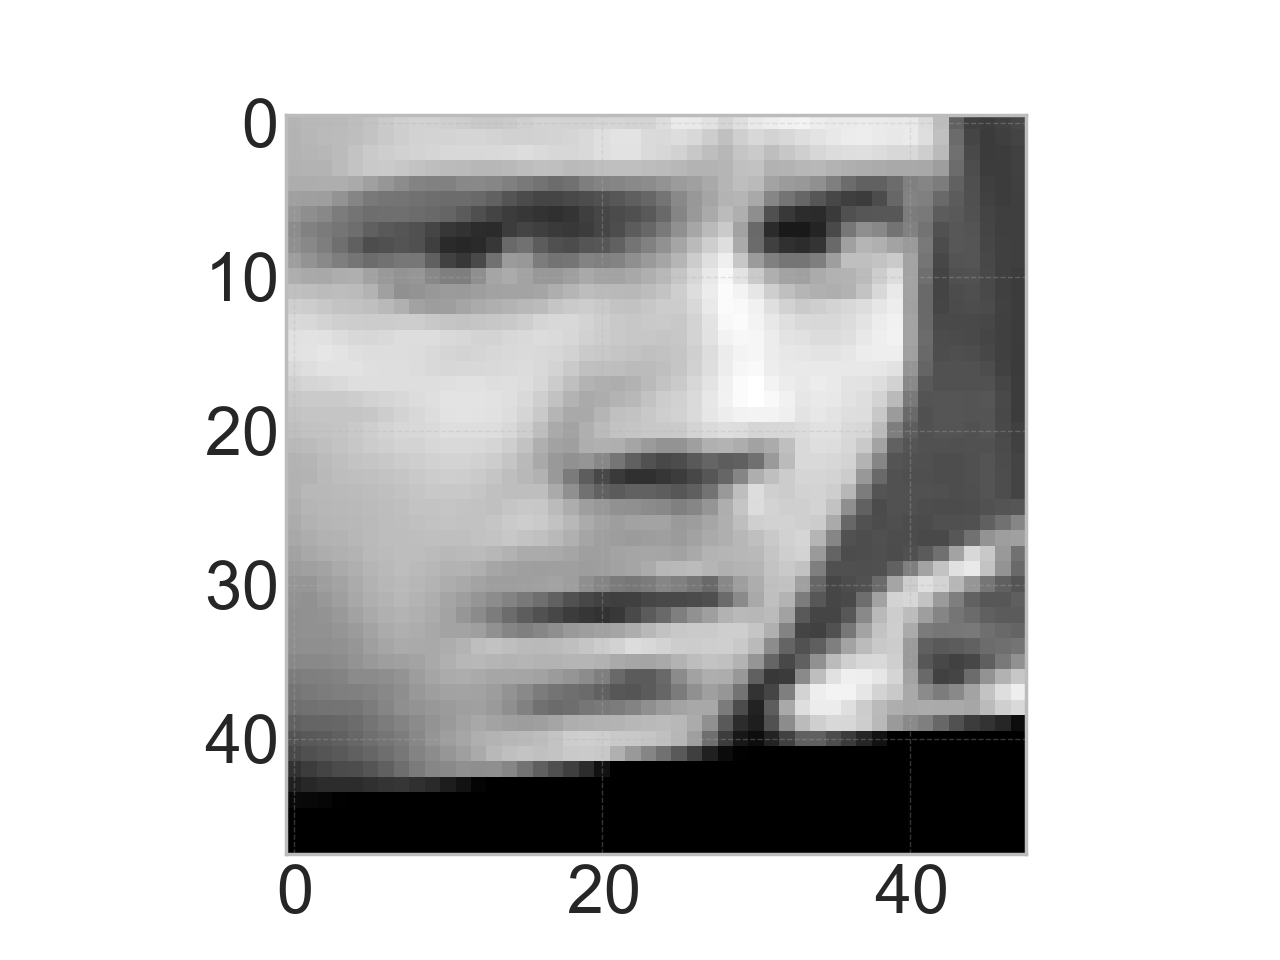

In [253]:
k=images_arr[0].reshape(48,-1)
plt.figure()
plt.imshow(k,cmap='gray')

In [267]:
new_data=pd.DataFrame(images_arr,columns=np.arange(48*48))
new_data['label']=face_labels
new_data['file_no']=filename

In [268]:
new_data.head()

0         1         2         3         4         5         6  \
0  0.576471  0.584314  0.588235  0.592157  0.603922  0.623529  0.643137   
1  0.019608  0.062745  0.125490  0.243137  0.368627  0.419608  0.439216   
2  0.411765  0.498039  0.529412  0.552941  0.576471  0.592157  0.580392   
3  0.196078  0.207843  0.243137  0.294118  0.215686  0.219608  0.396078   
4  0.321569  0.415686  0.490196  0.521569  0.529412  0.529412  0.537255   

          7         8         9   ...         2296      2297      2298  \
0  0.658824  0.666667  0.662745   ...     0.000000  0.000000  0.000000   
1  0.439216  0.419608  0.427451   ...     0.705882  0.705882  0.701961   
2  0.545098  0.482353  0.439216   ...     0.000000  0.000000  0.000000   
3  0.666667  0.733333  0.756863   ...     0.000000  0.000000  0.000000   
4  0.533333  0.529412  0.517647   ...     0.321569  0.305882  0.298039   

       2299      2300      2301      2302      2303  label  file_no  
0  0.000000  0.000000  0.000000  0.000000  0.000000      0        0  
1  0.701961  0.705882  0.709804  0.600000  0.133333      3    10000  
2  0.000000  0.000000  0.000000  0.000000  0.000000      3    10001  
3  0.000000  0.000000  0.000000  0.000000  0.000000      0    10002  
4  0.298039  0.282353  0.270588  0.219608  0.133333      6    10003  

[5 rows x 2306 columns]

In [269]:
# # new_data.to_csv('new_data.csv')

# # jb.dump(new_data,'new_data.pickle')

# # d1=jb.load('new_data.pickle')

# # d2=pd.read_csv('new_data.csv',index_col=0)

# # d2.head()

# new_data.to_pickle('new_data_pandas.pickle')

# d3=pd.read_pickle('new_data_pandas.pickle')

In [284]:
old_data=pd.DataFrame(images)
old_data['label']=labels
old_data['file_no']=old_data.index
old_data.head()

0    1    2    3    4    5    6    7    8    9   ...     2296  2297  \
0   70   80   82   72   58   58   60   63   54   58   ...      183   136   
1  151  150  147  155  148  133  111  140  170  174   ...       95   108   
2  231  212  156  164  174  138  161  173  182  200   ...      152   122   
3   24   32   36   30   32   23   19   20   30   41   ...      132   132   
4    4    0    0    0    0    0    0    0    0    0   ...       31    31   

   2298  2299  2300  2301  2302  2303  label  file_no  
0   106   116    95   106   109    82      0        0  
1   102    67   171   193   183   184      0        1  
2   114   101    97    88   110   152      2        2  
3   133   136   139   142   143   142      4        3  
4    31    27    31    30    29    30      6        4  

[5 rows x 2306 columns]

In [286]:
old_data.to_pickle('old_data_pandas.pickle')